<a href="https://colab.research.google.com/github/JoySoon/DataAnalysis/blob/backup/JoySoon/ch07_02_%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9D%91%EC%9A%A9_KSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

## 데이터의 종류
* 데이터의 특성에 따라서 시각화 방식도 달라짐
* 정형 데이터 : 값으로 나타낼 수 있는 데이터 (숫자)
* 비정형 데이터 : 정형 데이터가 아닌 것 (사진, 언어...)


## 정형 데이터
|대분류|소분류|예시|
|:-|:-|:-|
|수치형 데이터<br>(사칙 연산이 가능한 데이터)|연속형 데이터|키, 몸무게, 수입
||이산형 데이터|과일 개수, 책의 페이지 수
|범주형 데이터<br>(범주로 나누어지는 데이터)|순서형 데이터|학점, 순위(랭킹)|
||명목형 데이터|성별, 음식종류, 우편번호|

## 수치형 데이터 numerical data
> 사칙 연산이 가능한 데이터 (+, -, *, /)

* **연속형 데이터** continuous data : 값이 연속된 데이터
  * 15cm / 30cm -> 16, 17, 18, 19, 20...
  * 15.1 .... 29.9, 15.000001 ... 29.999999
  * 값 사이에 무한한 사이값
  * 값이 끊기지 않고 연속된 데이터를 **연속형 데이터**라고 함
* **이산형 데이터** discrete data : 정수로 딱 떨어져 셀 수 있는 데이터 (자연수)
  * 초밥 : 12g (연속형 데이터) / 밥알 수 320, 280개? 280.5개. (이산형)

> <mark>연속형 데이터</mark> : 실수형(float)으로 표현할 수 있는 데이터, 이산형 데이터 : 정수형(int)로 표현할 수 있는 데이터


## 범주형 데이터 categorical data
> 범주를 나눌 수 있는 (그룹, 분류, 소속) 데이터로, 사칙 연산 X

* 순서형 데이터 ordinal data : 순위 ranking 을 매길 수 있는 데이터 (비교가 가능하다) / 크고 작음.
  * 학점 (숫자로 나오는게 아니라, 분류체계), 스포츠 경기 순위
* 명목형 데이터 nominal data : 순위가 따로 없는, 비교할 수 없는, 더 높고 낮고 X 데이터
  * 성별, 우편번호, 반, 소속들.

> 숫자로 되어 있다고 해서 무조건 수치형 데이터가 아니다

## 탐색적 데이터 분석(Exploratory Data Analysis)과 그래프
* `그래프, 통계 수치 등을 활용해서 데이터를 파악`하는 과정
* 탐색적 데이터 분석 단계에서는 다양한 그래프 그림
* 그래프는 데이터를 한눈에 파악하는데 도움을 줌 (경향성)
    1. 데이터가 어떻게 구성되어 있는지
    1. 어떤 변수(피처)가 중요한지
    1. 어떤 피처를 제거할지
    1. 어떻게 새로운 변수를 만들지 등
> 모델링에 필요한 다양한 정보를 얻을 수 있다.

**모델링** : '변수들' -> 답을 이끌어내는 과정
* 통계, 머신러닝, 딥러닝 ... -> 모델링
1. 어떠한 변수를 넣어야지? 빼야지?
1. 변형을 어떻게 시켜야지? (결측치, 이상치...)
1. 전처리 -> 피처 엔지니어링... 모든 데이터를 하나하나 읽어보면서 할 것인가? 차트, 플롯 => 경향성 => 변수(피처)를 튜닝해나가는 과정

## 수치형 데이터 시각화
* 수치형 데이터는 '일정한 범위 내에서 어떻게 분포(distribution)' 되어 있는지 중요 (몰림, 퍼짐...)
* 이 분포를 알아야 데이터를 어떻게 변환(transformation)할지, 어떻게 해석해서 활용할지 판단
* 데이터의 분포가 열(변수)마다 너무 다르면 -> 머신러닝 X -> 어느정도 비슷한 모양으로 변경 -> 스케일링 -> 어떠한 스케일링?

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

In [ ]:
titanic.tail()

In [2]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 히스토그램 (histplot)
* 수치형 데이터의 구간별 빈도수를 나타내는 그래프
* `sns.histplot(data=...)`

<AxesSubplot:xlabel='age', ylabel='Count'>

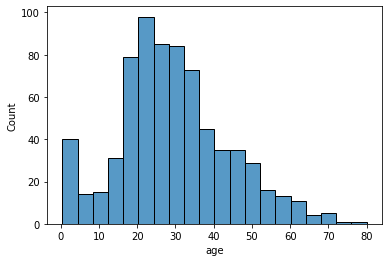

In [11]:
# data = 분석하려고 하는 데이터셋(df), x = 분포를 파악하려는 변수명
sns.histplot(data=titanic, x = "age")
# sns.histplot(data=titanic, x = "fare")
# sns.histplot(data=titanic, x = "pclass")

<AxesSubplot:xlabel='age', ylabel='Count'>

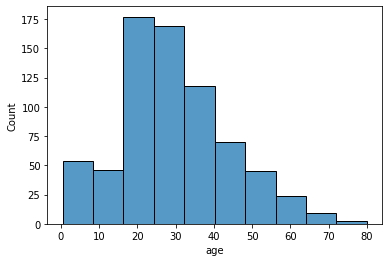

In [12]:
# 구간을 특정 값으로 고정하고 싶을 때
sns.histplot(data=titanic, x = "age", bins=10) # 수치형 데이터 빈도

<AxesSubplot:xlabel='age', ylabel='Count'>

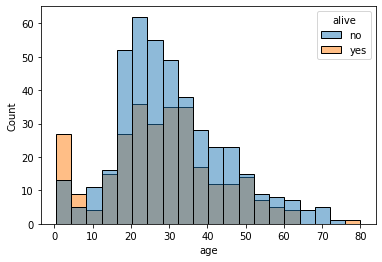

In [14]:
# 특정 범주별 (속성?그룹?특성) hue
sns.histplot(data=titanic, x = "age", hue="alive") 

<AxesSubplot:xlabel='age', ylabel='Count'>

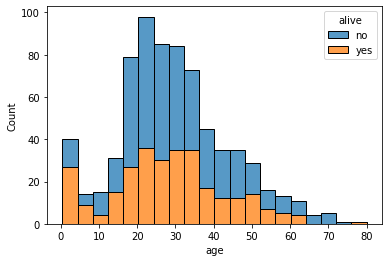

In [15]:
# 범주별 누적
sns.histplot(data=titanic, x = "age", hue="alive", multiple='stack') 

<AxesSubplot:xlabel='fare', ylabel='Count'>

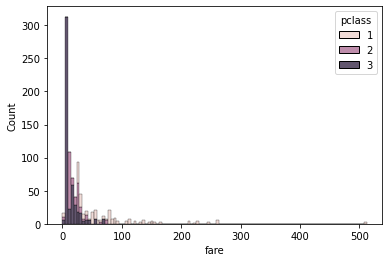

In [19]:
sns.histplot(data=titanic, x = "fare", hue="pclass", multiple='stack')

### 커널밀도추정 함수 그래프 (kdeplot)
* 커널밀도추정 kernel density estimation
---
* 히스토그램을 매끄럽게 곡선으로 연결한 그래프
* `sns.kdeplot()`

<AxesSubplot:xlabel='age', ylabel='Density'>

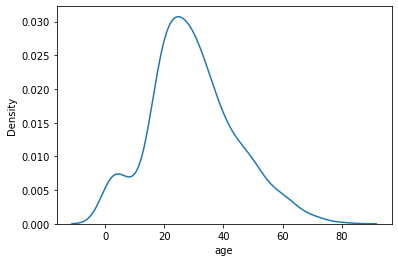

In [20]:
sns.kdeplot(data=titanic, x='age') # 히스토그램과 구조 유사

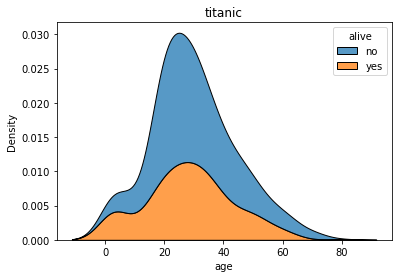

In [24]:
import matplotlib.pyplot as plt

hue = 'alive' #@param['alive','class']
plot_dict = {
    'data':titanic,
    'x': 'age',
    'hue':hue,
    'multiple':'stack'
}

# sns.kdeplot(data=titanic, x = "age", hue="alive", multiple='stack') 
sns.kdeplot(**plot_dict)
plt.title('titanic')
plt.show()

### 분포도(displot)
* 수치형 데이터 하나의 분포를 나타내는 그래프
* `sns.displot()`을 많이 사용
* `hisplot`, `kdeplot`을 모두 그릴 수 있음 (패러미터 조정)

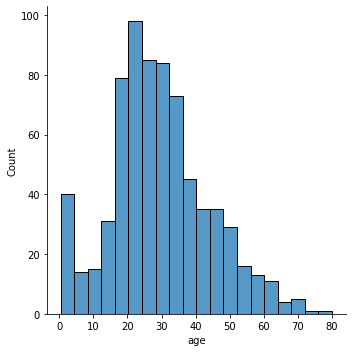

In [25]:
sns.displot(data=titanic, x='age') # 히스토그램

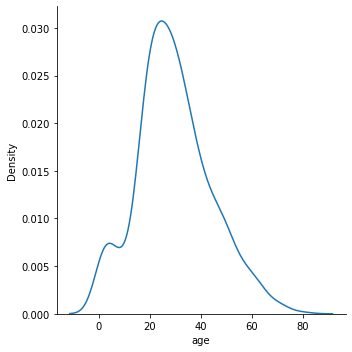

In [26]:
sns.displot(data=titanic, x='age', kind='kde') # 히스토그램

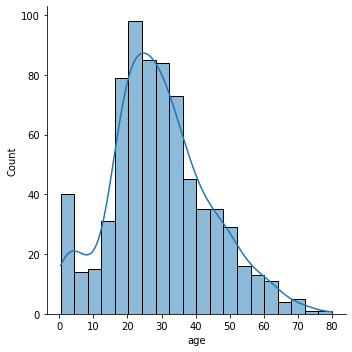

In [80]:
# 히스토그램 + 커널밀도추정함수
option = "\uD788\uC2A4\uD1A0\uADF8\uB7A8+KDE" #@param["히스토그램", "KDE", "히스토그램+KDE"]
if option == "히스토그램":
    sns.displot(data=titanic, x='age')
elif option == "KDE":
    sns.displot(data=titanic, x='age', kind='kde')
elif option == "히스토그램+KDE":
    sns.displot(data=titanic, x='age', kde=True)

### 러그플롯(rugplot)
* 주변 분포 marginal distribution 를 나타내는 그래프 (빈도가 얼마나 밀집되어 있는지)
* 단독으로 사용하기 보다 -> 주로 다른 분포도 그래프와 함께 사용
* 단일 변수가 어떻게 분포되어 있는지를 x축 위에 작은 선분(러그,rug)으로 표시하는 플롯. 값이 밀집되어 있을 수록 작은 선분들도 밀집

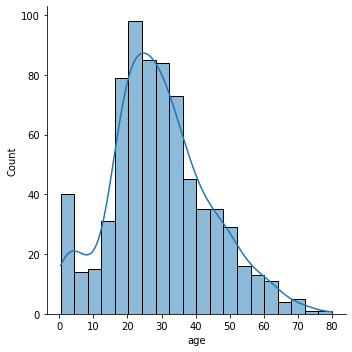

In [33]:
# sns.kdeplot(data=titanic, x='age') # 히스토그램
# sns.rugplot(data=titanic, x='age') # 히스토그램
# sns.hisplot(data=titanic, x='age') # 히스토그램
sns.displot(data=titanic, x='age', kde=True) # 히스토그램

## 범주형 데이터 시각화
* 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악

### 막대 그래프 (barplot)
* `sns.barplot()`로 그릴 수 있음
* 단순히 그래프를 그리는 것에 그치지 않고, 평균과 신뢰구간
  * 수치형 데이터 평균 : 막대 높이
  * 신뢰구간 : 오차 막대 error bar 표현

<AxesSubplot:xlabel='class', ylabel='fare'>

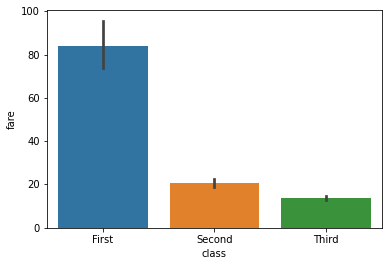

In [37]:
# x : 범주형 데이터 - 등급
# y : 수치형 데이터 - 운임
# barplot -> 원본 평균이 X (통계적인 과정을 거친 평균)
# x로 분류기준을 준 범주형 데이터로 그룹을 나눈다음에, 복원샘플링
# 검은 막대 : 격차
# 겹쳐지면 바로 보기 힘듬
sns.barplot(x='class', y='fare', data=titanic)

### 포인트플롯 (pointplot)
* 막대 그래프 모양만 다를 뿐, 동일한 정보 제공
* 차이점 : 그래프를 점과 선으로 표시한다

<AxesSubplot:xlabel='class', ylabel='fare'>

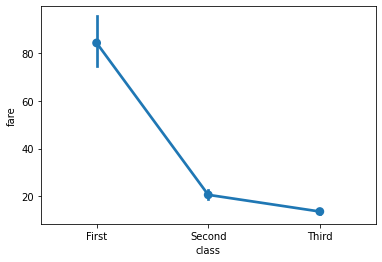

In [38]:
sns.pointplot(x='class', y='fare', data=titanic)

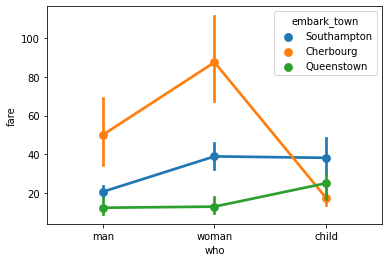

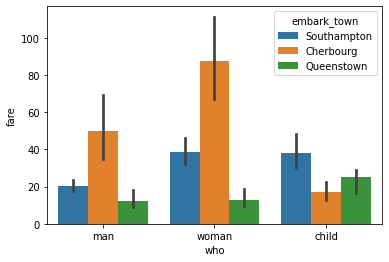

In [42]:
import matplotlib.pyplot as plt
# 포인트 플롯은 여러 그래프를 동시에 그릴 때 시각적으로 유리함
sns.pointplot(x='who', y='fare', data=titanic, hue='embark_town')
plt.show()
sns.barplot(x='who', y='fare', data=titanic, hue='embark_town')
plt.show()

### 박스플롯 (Boxplot)
> 5가지 요약 수치 five-number summary (표시)

* 제1사분위수(Q1): 전체 데이터 중 하위 25%에 해당하는 값
* 제2사분위수(Q2): 50%에 해당하는 값(중앙값)
* 제3사분위수(Q3): 상위 25%에 해당하는 값
* 사분위범위수(IQR): $Q3-Q1$
* 최댓값: $Q3+(1.5 \times IQR)$
* 최솟값: $Q1-(1.5 \times IQR)$
* 이상치: 최댓값보다 큰 값과 최솟값보다 작은 값

<AxesSubplot:xlabel='class', ylabel='age'>

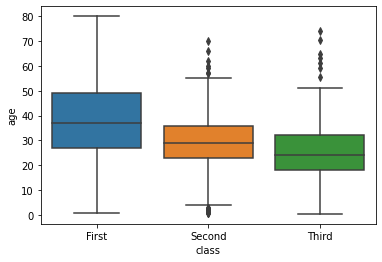

In [43]:
sns.boxplot(x='class', y='age', data=titanic)
# 산술평균값 중앙값

### 바이올린플롯(violinplot)
* 박스플롯 + KDE 합쳐놓은 그래프
* 박스플롯 - 5개 지표 서머리 / 곡선형태의 외형

<AxesSubplot:xlabel='class', ylabel='age'>

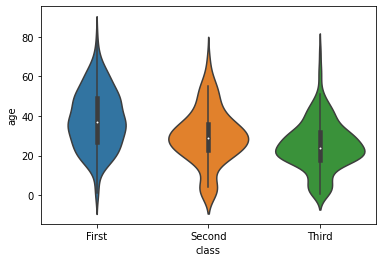

In [45]:
# 바이올린플롯 : 수치형 데이터의 전체적인 분포 양상
# 박스플롯 : 5가지 요약 수치 집중해서 보고 싶음
sns.violinplot(x='class', y='age', data=titanic)

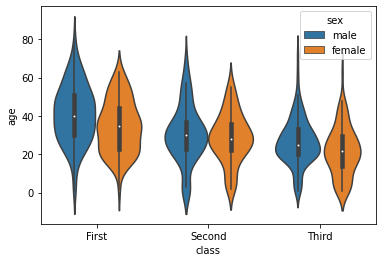

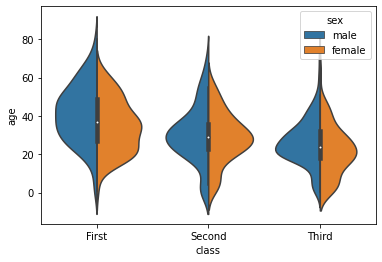

In [48]:
# hue -> 성별로 좌석 등급별 나이를 다시 나눠준 것
sns.violinplot(x='class', y='age', hue='sex', data=titanic)
plt.show()
# 왼쪽, 오른쪽 나뉘어서 한 번에 표시
sns.violinplot(x='class', y='age', hue='sex', data=titanic, split=True)
plt.show()

### 카운트플롯(countplot)
* value_counts 랑 유사
* 범주형 데이터의 개수를 확인할 때 사용
* 주로 범주형 피쳐(변수)나 범주형 타깃값의 분포가 어떤지 파악하는 용도로 사용
* `sns.countplot()`

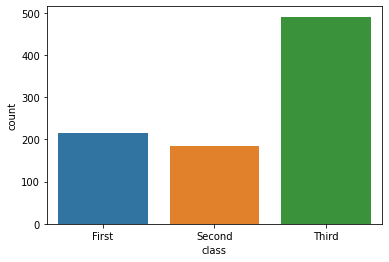

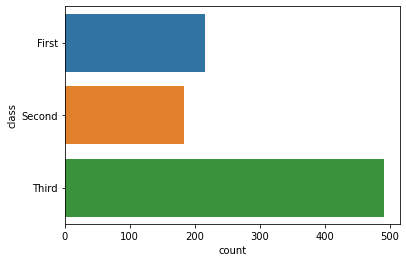

In [49]:
# sns.countplot(x='class', data=titanic)
sns.countplot(x='class', data=titanic)
plt.show()
sns.countplot(y='class', data=titanic)
plt.show()

<AxesSubplot:xlabel='alive', ylabel='count'>

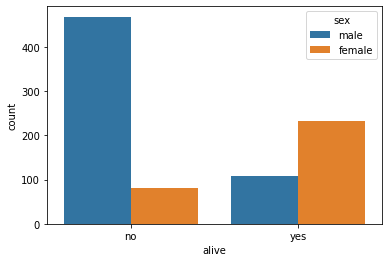

In [51]:
# titanic.info()
# titanic.alive.value_counts()
sns.countplot(x='alive', data=titanic, hue='sex')

<AxesSubplot:xlabel='alive', ylabel='count'>

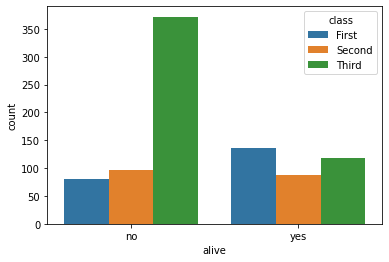

In [52]:
sns.countplot(x='alive', data=titanic, hue='class')

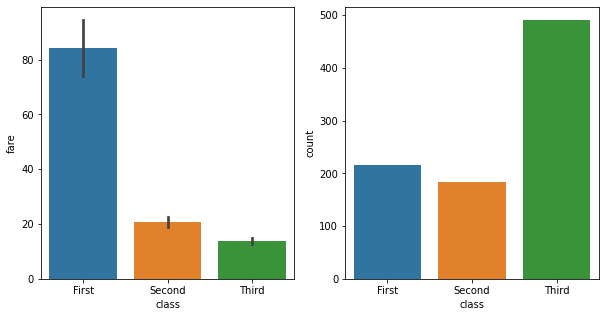

In [56]:
# barplot vs countplot
# barplot : 막대 그래프 를 그려줌
# - 범주형 데이터별 수치형 데이터의 통계값(평균)
# countplot : 범주형 데이터의 갯수
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.barplot(x='class', y='fare', data=titanic) # x,y 둘다 있어야 함 x점주형/ y 연속형
plt.subplot(122)
sns.countplot(x='class', data=titanic) # x 혹은 y 하나만 범주형변수, 명목형 변수
plt.show()

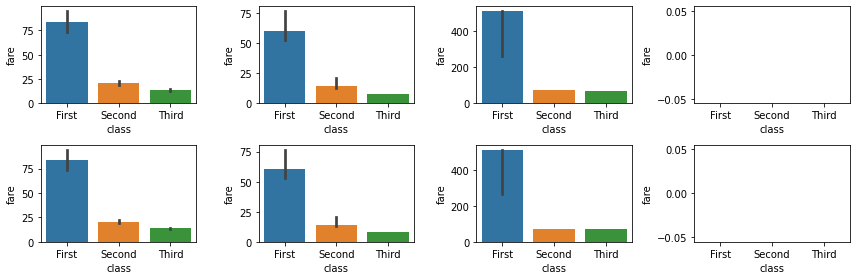

In [59]:
import numpy as np

def draw_barplot(subplot, estimator):
    plt.subplot(subplot)
    sns.barplot(x='class', y='fare', data=titanic, estimator=estimator)

plt.figure(figsize=(12, 4))
# plt.subplot(141)
# sns.barplot(x='class', y='fare', data=titanic)
# sns.barplot(x='class', y='fare', data=titanic, estimator=np.mean) #  평균값
# sns.barplot(x='class', y='fare', data=titanic, estimator=np.median) # 중앙값
estimators = [np.mean, np.median, np.max, np.min] * 2
for i, v in enumerate(estimators):
    draw_barplot(241 + i, v)
plt.tight_layout()
plt.show()

### 파이 그래프 (pie)
* 범주형 데이터별 비율을 알아볼 때 사용하는 그래프
* seaborn X (matplotlib을 써야함)

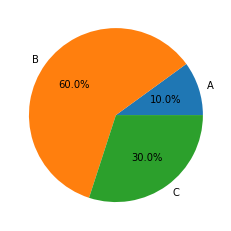

In [60]:
x = [10, 60, 30]
labels = ['A', 'B', 'C']

plt.pie(x=x, labels=labels, autopct='%.1f%%')
plt.show()

## 데이터 관계 시각화
* 관계도 : 여러 데이터 사이의 관계를 살펴보기 위한 그래프

### 히트맵(heatmap)
* 데이터 간의 관계를 **색상**으로 표현한 그래프
* 비교해야할 데이터가 많을 때 주로 사용
* `sns.heatmap(...)` 함수를 사용해서 호출

In [61]:
import seaborn as sns

In [62]:
# 비행기 탑승자 수 데이터
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [63]:
flights.info() # 144개 / year, month, 승객수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [81]:
# 각 연도의 월별 승객수
fp = flights.pivot(index='month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


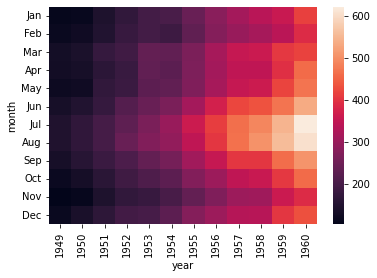

In [ ]:
sns.heatmap(data=fp)

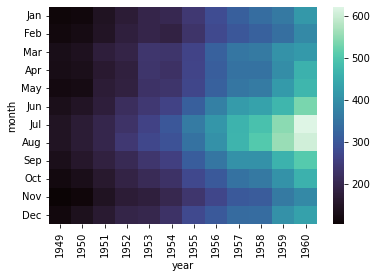

In [ ]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.heatmap(data=fp, camp='mako')

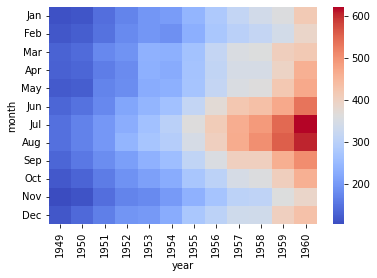

In [ ]:
sns.heatmap(data=fp, camp='coolwarm')

In [ ]:
fp.T.corr()

### 라인플롯 (lineplot)
* 두 수치형 데이터 사이의 관계를 나타낼 때 사용 (직선)
* x에 전달한 값에 따라 y에 전달한 값의 평균 + 신뢰구간
* `sns.lineplot()`

<AxesSubplot:xlabel='year', ylabel='passengers'>

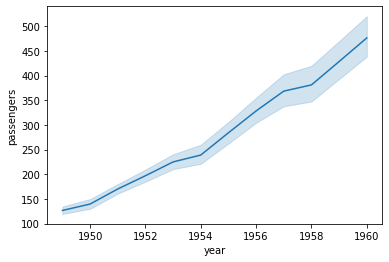

In [67]:
sns.lineplot(x='year', y='passengers', data=flights)

### 산점도 (scatterplot)
* 두 데이터 간의 관계를 점으로 표현한 그래프

In [68]:
tips = sns.load_dataset('tips')

In [69]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

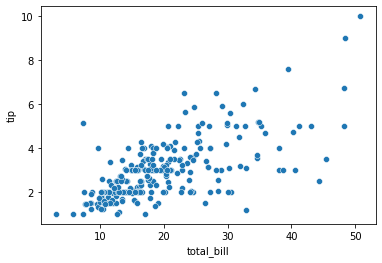

In [70]:
sns.scatterplot(x= 'total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

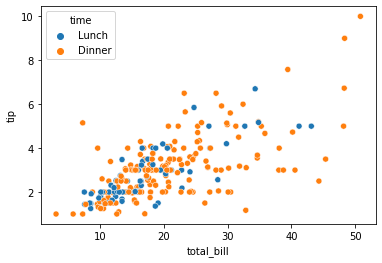

In [73]:
sns.scatterplot(x= 'total_bill', y='tip', data=tips, hue='time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

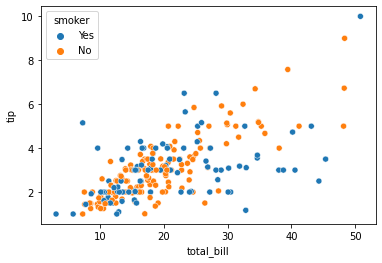

In [75]:
sns.scatterplot(x= 'total_bill', y='tip', data=tips, hue='smoker')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

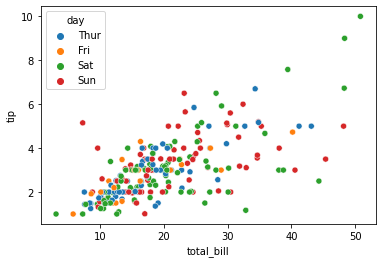

In [76]:
sns.scatterplot(x= 'total_bill', y='tip', data=tips, hue='day')

### 회귀선을 포함한 산점도 그래프 (regplot)
* `regplot( )` : 산점도 + 선형회귀선
* 회귀선을 그리면 전반적인 상관관계 파악이 쉬워짐

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

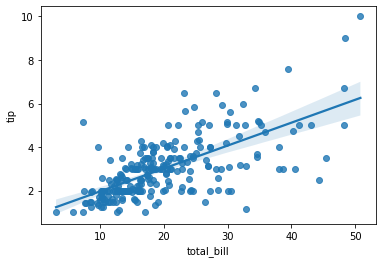

In [77]:
# 95% 신뢰구간
sns.regplot(x= 'total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

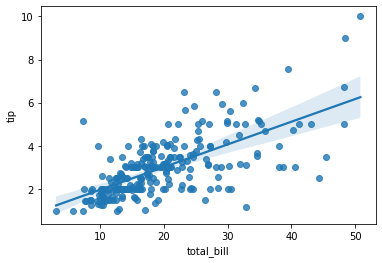

In [79]:
# 99% 신뢰구간
sns.regplot(x= 'total_bill', y='tip', data=tips, ci=99)

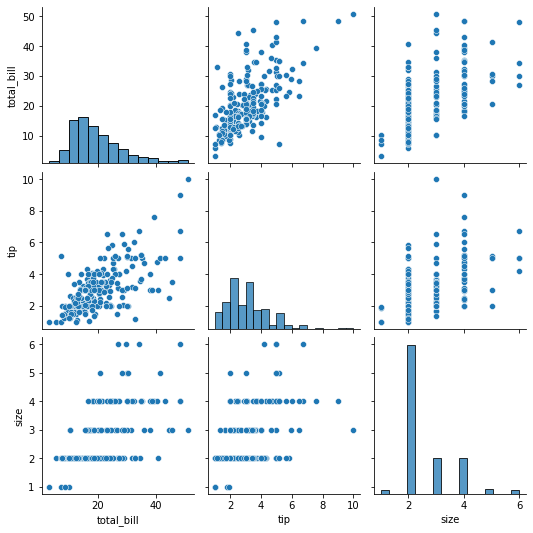

In [ ]:
# 한 번 실행해 볼 것
# https://steadiness-193.tistory.com/198
sns.pairplot(tips)